# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [16, 10]

# Loading the data

In [2]:
df = pd.read_csv('Train.csv')
#df.head()

# Cleaning data

In [3]:
df.isnull().sum()
#seems to have no na values
df.fillna(0)
#removing columns that are redundant or don't have useful information to us
#unspecified and N/A are pretty much the same for our purposes
df = df.drop(columns = ["pw_07", "pw_08","dw_00","dw_11", "psa_02", "psa_04", "lan_14"])
df.drop_duplicates(keep = "first")

,ward,total_households,total_individuals,target,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.003146,0.017230,0.004735,0.048888,0.000654,0.017798,...,0.074058,0.000472,0.000472,0.000472,0.000000,0.006203,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.002262,0.010433,0.000000,0.003030,0.000000,0.008028,...,0.557859,0.003467,0.003030,0.000713,0.000000,0.008414,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.006601,0.061118,0.000812,0.003912,0.000812,0.017205,...,0.326884,0.046445,0.002150,0.001458,0.000000,0.003670,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.004423,0.016099,0.000000,0.000674,0.000000,0.006907,...,0.301241,0.108998,0.009235,0.007870,0.000000,0.004803,ZA3453004,-27.913875,22.755314,2.793699


# Correlations

<AxesSubplot:>

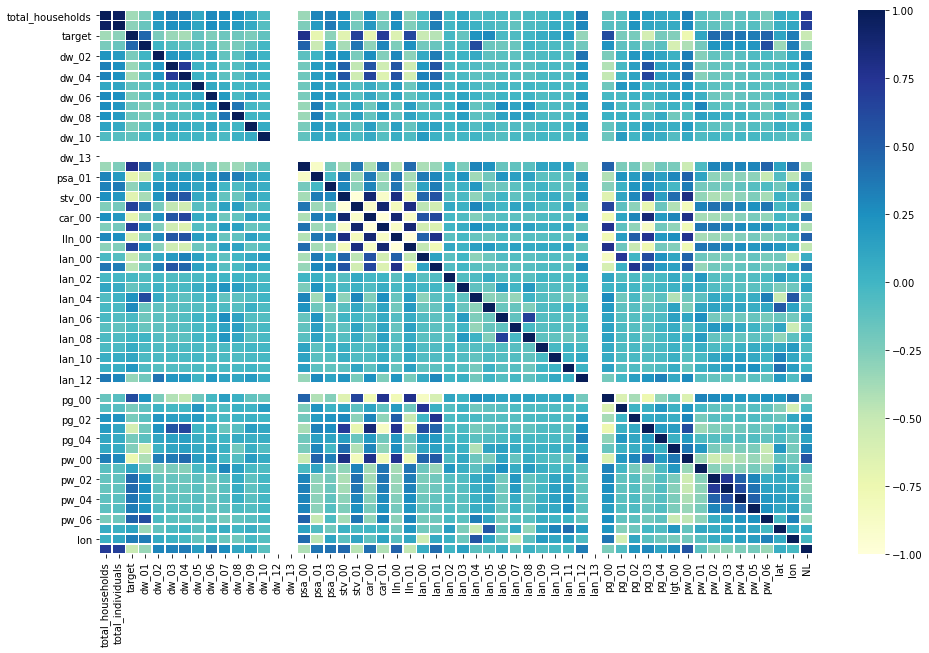

In [27]:
#training data correlations
corr = df.corr()

plt.figure(figsize = (16,10))
sns.heatmap(corr, cmap="YlGnBu", linewidths=.5)

positive correlations

In [31]:
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [5]:
#putting positive correlation data into a data frame called corr1
corr1 = pd.DataFrame(df.corr()['target'].sort_values(ascending=False))
#keeping only the variables w correlation score > 0.7
corr1 = corr1[corr1['target'] > 0.5]
high_corr = corr1.index
high_corr

Index(['target', 'psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00'], dtype='object')

negative correlations 

In [32]:
df.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

In [6]:
#correlation data into a data frame called corr2
corr2 = pd.DataFrame(df.corr()['target'].sort_values(ascending=False))
corr2 = corr2[corr2['target'] < -0.5]
low_corr = corr2.index
low_corr

Index(['lan_00', 'NL', 'pg_03', 'lln_00', 'stv_00', 'car_00', 'psa_01',
       'pw_00'],
      dtype='object')

In [7]:
strong_corr = df[['target', 'psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00', 'lan_00', 'NL', 'pg_03', 'lln_00', 'stv_00', 'car_00', 'psa_01', 'pw_00']]
#strong_corr

# Linear Regression Modelling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [9]:
# #for all the numerical columns we kept
X = df.drop(columns = ['ward', 'target', 'ADM4_PCODE'] )
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.25, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
X = X_test.reset_index()

X["target"] = y_test.tolist()
X["prediction"] = predictions
#X

In [10]:
#metrics: r2
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.8619875606630617

In [11]:
#for the most correlated columns
X = strong_corr.drop(columns = "target")
y  = strong_corr['target']
# y is same as before: y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.25, random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
#X

In [12]:
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.833627137276876

# Cross Validation (with strongly correlated variables)

In [33]:
from sklearn.model_selection import cross_val_score

In [45]:
def r2_cv(n):
    cv_scores = cross_val_score(estimator=model, 
    X = strong_corr.drop(columns = 'target'), 
    y = strong_corr['target'], 
    scoring = "r2", cv = n)
    print('cv =', n, ': ',cv_scores.mean())

for i in range(3, 16):
    r2_cv(i)
#not as good as regular LR model

cv = 3 :  0.7651908491872833
cv = 4 :  0.7428985668939183
cv = 5 :  0.7807904763921147
cv = 6 :  0.7420835978821306
cv = 7 :  0.7483584259435041
cv = 8 :  0.742147765952687
cv = 9 :  0.7487103606506721
cv = 10 :  0.7389743484068187
cv = 11 :  0.7267007703317631
cv = 12 :  0.7314951819130374
cv = 13 :  0.7138220222680469
cv = 14 :  0.7203075553687602
cv = 15 :  0.7168775267262405


# Modeling

In [20]:
df_test = pd.read_csv('Test.csv')
df_test

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.000000,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.000000,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.000000,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.000000,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.000000,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,19100107: Ward 107,16076.89903,43296.51372,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,...,0.000392,0.000291,0.000148,0.002277,0.0,0.0,ZA1910107,-33.806524,18.496094,33.913055
1009,19100108: Ward 108,17470.24004,53538.12816,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,...,0.030744,0.008313,0.000348,0.022417,0.0,0.0,ZA1910108,-33.982120,18.673308,60.009486
1010,19100109: Ward 109,9467.25336,40332.11708,0.579036,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,...,0.003850,0.000990,0.000352,0.010670,0.0,0.0,ZA1910109,-34.062704,18.767457,35.834860
1011,19100110: Ward 110,6111.31195,27793.92916,0.623537,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,...,0.000559,0.000000,0.000204,0.026741,0.0,0.0,ZA1910110,-34.057772,18.487893,50.153301


In [21]:
all_data = pd.concat([df, df_test], 0)

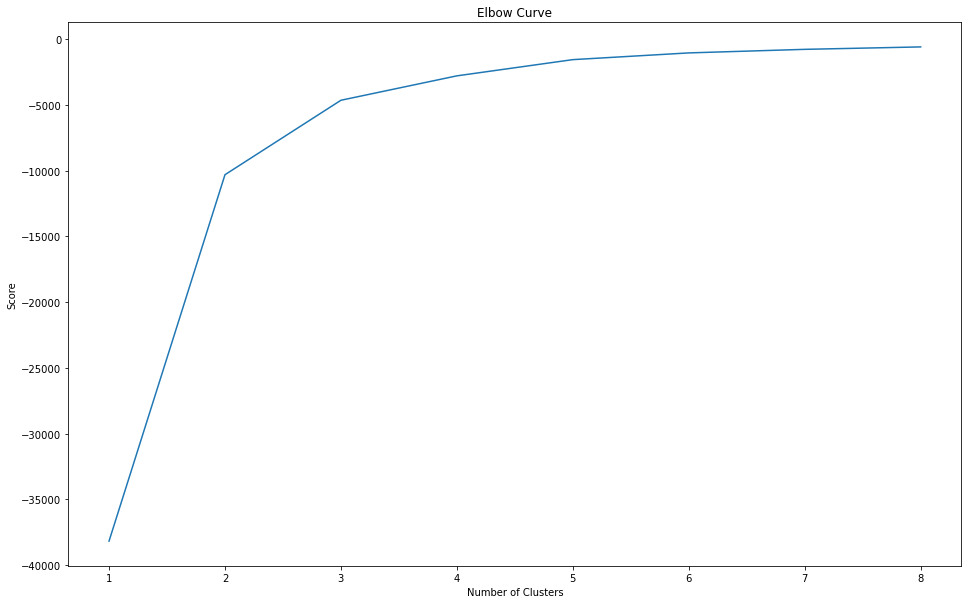

In [22]:
K_clusters = range(1,9)

#range is shifted from 0-4 to 1-5 to avoid infinity-type error

kmeans = [KMeans(n_clusters = i) for i in K_clusters]

Y_axis = all_data[['lat']]
X_axis = all_data[['lon']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualization

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#This Elbow Curve shows the optimal amount of clusters. After 5, the complexity plateaus, and adding additional 
    # clusters would be redundant. 

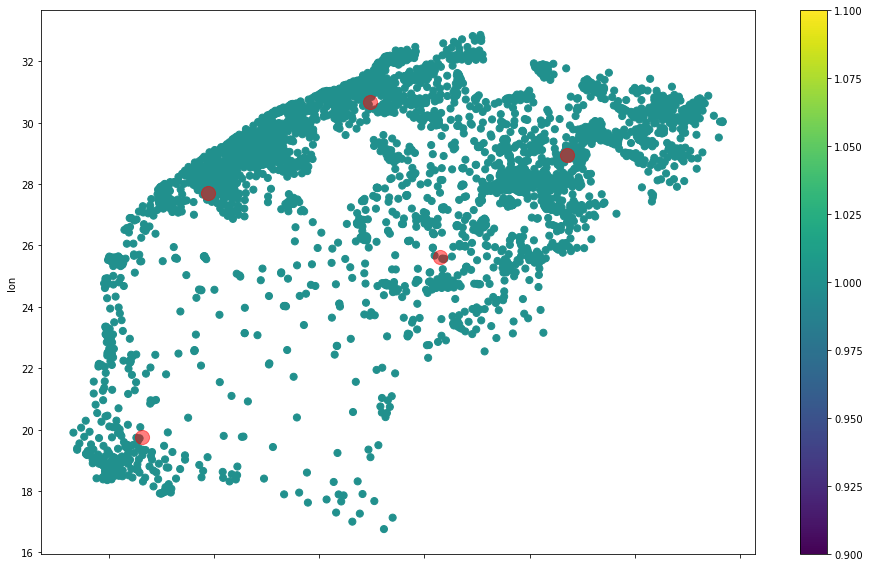

In [24]:
# Using geolocation, coordinates are organized into 5 clusters (0 - 4). These clusters allow for the examination
# of levels of poverty in relation to highly-correlating variables. 

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(all_data[['lat','lon']])
all_data['cluster_label'] = kmeans.fit_predict(all_data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(all_data[['lat','lat']])
# Full_data['cluster_label'].value_counts()
all_data.plot.scatter(x = 'lat', y = 'lon', c = labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [25]:
all_data['cluster_label'].value_counts()

2    1430
0     847
4     591
3     536
1     431
Name: cluster_label, dtype: int64